In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Загрузка и нормализация датасета**

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

**Вывод первого изображения из обучающейся выборки**

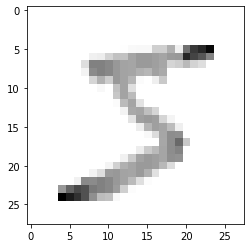

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Подгон всех изображений к одному разрешению**

In [ ]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE ,1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
print(x_trainr.shape[1:])

(28, 28, 1)


**Обучение сети**

In [ ]:
model = keras.Sequential()

#свертка 1
model.add(keras.layers.Conv2D(64, (3,3), input_shape = x_trainr.shape[1:], activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
          
#свертка 2
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
          
#свертка 3
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#после свертки выравнивание
model.add(keras.layers.Flatten())
#классификация
model.add(keras.layers.Dense(64, activation="relu"))
#дополнительный слой
model.add(keras.layers.Dense(32, activation="relu"))

#выход
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_trainr, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 19s 58ms/step - loss: 0.5680 - accuracy: 0.8205 - val_loss: 0.1810 - val_accuracy: 0.9440
Epoch 2/5
329/329 [==============================] - 19s 58ms/step - loss: 0.1595 - accuracy: 0.9520 - val_loss: 0.1295 - val_accuracy: 0.9608
Epoch 3/5
329/329 [==============================] - 19s 58ms/step - loss: 0.1113 - accuracy: 0.9662 - val_loss: 0.1181 - val_accuracy: 0.9626
Epoch 4/5
329/329 [==============================] - 20s 61ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.1334 - val_accuracy: 0.9566
Epoch 5/5
329/329 [==============================] - 21s 62ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0798 - val_accuracy: 0.9765


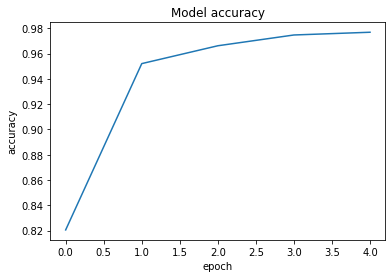

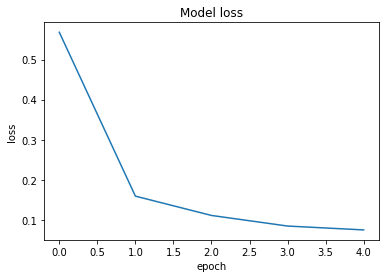

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Сохранение модели**

In [ ]:
# model.save("number")

INFO:tensorflow:Assets written to: number\assets


**Вывод точности модели**

In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0716 - accuracy: 0.9772
test_acc: 0.9771999716758728


**Функция подготовки изображения для распознования**

In [ ]:
def img(imageName):
    img = cv2.imread(imageName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,cmap = plt.cm.binary)
    plt.title('Исходное изображение')
    plt.show()
    
    resize = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newimg = keras.utils.normalize(resize, axis=1)
    newimg = np.array(newimg).reshape(-1, 28, 28, 1)
    
    prediction = model.predict(newimg)

    return prediction

**Распознование цифр**

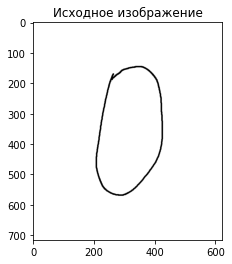

Результат: 0


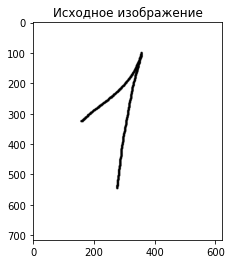

Результат: 1


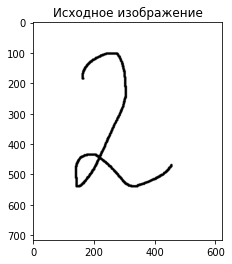

Результат: 2


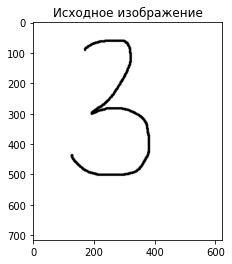

Результат: 3


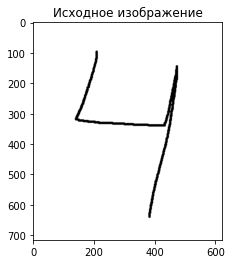

Результат: 4


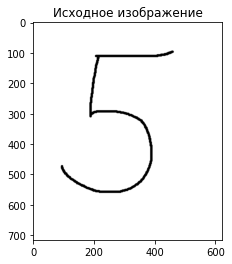

Результат: 5


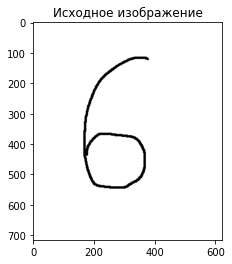

Результат: 6


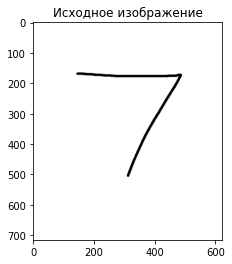

Результат: 7


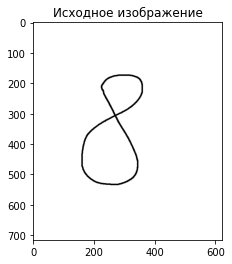

Результат: 8


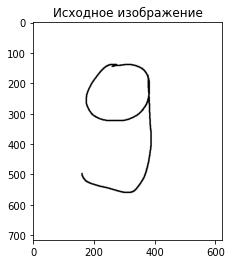

Результат: 9


In [ ]:
model = tf.keras.models.load_model("number")
for number in range(10):
    prediction = img(str(number)+'.png')
    print("Результат:",np.argmax(prediction))

In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0716 - accuracy: 0.9772
test_acc: 0.9771999716758728


**Вывод**
<p>1)Была предложена модель сверточной нейронной сети показывающая точность в 97%.</p>
<p>2)Предложенные изображения, не из датасета, были успешно распознаны, что показыват пригодность данной модели.</p>